In [ ]:
import pandas as pd
import numpy as np

# Choose the file path as a location on your computer:
file_path = r"C:\Users\MK\Desktop\metadata.csv"  #


# Load the data
df = pd.read_csv(file_path, low_memory=False)

# Continue with your analysis...
print(f"Successfully loaded data with shape: {df.shape}")
display(df.head())

Successfully loaded data with shape: (1056660, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Set up visualization style
plt.style.use('default')
sns.set_palette("viridis")

In [5]:
# Get the number of rows and columns
print(f"DataFrame Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

DataFrame Shape: (1056660, 19)
Number of rows: 1056660
Number of columns: 19


In [6]:
# Get a concise summary of the DataFrame, including dtypes and non-null counts
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null

In [7]:
# Get the total number of missing values for each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage.round(2))

Missing values per column:
cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

Percentage of missing values per column:
cord_uid              0.00
sha                  64.63
source_x              0.00
title                 0.05
doi                  37.84
pmcid                63.13
pubmed_id            52.78
license               0.00
abstract             22.29
publish_time          0.17
authors               2.26
journal               8.26
mag_id              100.00
who_covidence_id     54.30
arxiv_id

In [8]:
# The describe() method provides summary statistics for numerical columns.
# Use 'include' to get stats for all types or just objects.
print("Summary statistics for numerical columns:")
display(df.describe(include=[np.number])) # For numerical columns only

print("\nSummary statistics for object/string columns:")
display(df.describe(include=['O'])) # For object columns (e.g., strings)

Summary statistics for numerical columns:


,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08



Summary statistics for object/string columns:


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url
count,1056660,373766,1056660,1056157,656780,389571,498932,1056660,821116,1054846,1032791,969338,482935,14249,373766,315742,686934
unique,970836,373719,49,850366,655525,389571,498449,18,730712,8056,796659,54993,482935,14249,373719,315742,686934
top,kgpo6psq,31bc0fb718edaab9e33f678909710f62c40abebc,WHO,Reply,10.1016/j.scitotenv.2020.139397,PMC35282,35087663,unk,[Figure: see text].,2021,"Anonymous,",PLoS One,#covidwho-1638294,2110.00181,document_parses/pdf_json/31bc0fb718edaab9e33f6...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
freq,192,3,450459,251,9,1,5,601506,206,233709,3904,9953,1,1,3,1,1


In [9]:
# Data Cleaning
# Create a DataFrame for better visualization of missing data
missing_df = pd.DataFrame({
    'column_name': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
})
missing_df = missing_df.sort_values('missing_percentage', ascending=False)
print("Columns sorted by missing percentage:")
display(missing_df.head(20)) # Show the top 20 most incomplete columns

Columns sorted by missing percentage:


,column_name,missing_count,missing_percentage
mag_id,mag_id,1056660,100.000000
arxiv_id,arxiv_id,1042411,98.651506
pmc_json_files,pmc_json_files,740918,70.118865
pdf_json_files,pdf_json_files,682894,64.627600
sha,sha,682894,64.627600
pmcid,pmcid,667089,63.131849
who_covidence_id,who_covidence_id,573725,54.296084
pubmed_id,pubmed_id,557728,52.782163
doi,doi,399880,37.843772
url,url,369726,34.990063


In [10]:
# Data Cleaning Drop columns with more than 90% missing data
columns_to_drop = missing_df[missing_df['missing_percentage'] > 90]['column_name'].tolist()
print(f"Columns to drop: {columns_to_drop}")

# Drop them from the DataFrame
df_clean = df.drop(columns=columns_to_drop)
print(f"New shape after dropping columns: {df_clean.shape}")

Columns to drop: ['mag_id', 'arxiv_id']
New shape after dropping columns: (1056660, 17)


In [11]:
# Data Cleaning Drop rows where a critical column (e.g., 'publish_time') is missing
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['publish_time']) # Specify important columns in the `subset` argument
final_count = len(df_clean)
print(f"Dropped {initial_count - final_count} rows due to missing critical data.")

Dropped 1814 rows due to missing critical data.


In [12]:
# Check for exact duplicates across all columns
duplicate_rows = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If there are duplicates, you can remove them
if duplicate_rows > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Shape after removing duplicates: {df_clean.shape}")

Number of duplicate rows: 0


In [13]:
print("Final DataFrame Info:")
df_clean.info()
print("\nFinal missing values summary:")
print(df_clean.isnull().sum().sum()) # This should hopefully be 0, or a very small number you are comfortable with.

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1054846 entries, 0 to 1056659
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1054846 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1054846 non-null  object 
 3   title             1054343 non-null  object 
 4   doi               655682 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1054846 non-null  object 
 8   abstract          819393 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1030995 non-null  object 
 11  journal           969196 non-null   object 
 12  who_covidence_id  481121 non-null   object 
 13  pdf_json_files    373766 non-null   object 
 14  pmc_json_files    315742 non-null   object 
 15  url               685836 non-nul

In [14]:
# After identifying missing percentages,
print("Handling missing values...")

# 1. Drop columns with extremely high missingness (>95%)
high_missing_cols = missing_df[missing_df['missing_percentage'] > 95]['column_name'].tolist()
print(f"Dropping columns with >95% missing data: {high_missing_cols}")
df_clean = df.drop(columns=high_missing_cols)

# 2. For important columns with moderate missingness, 
# Fill missing abstracts with 'No abstract available'
df_clean['abstract'] = df_clean['abstract'].fillna('No abstract available')

# Fill missing journal information with 'Unknown'
df_clean['journal'] = df_clean['journal'].fillna('Unknown Journal')

# For authors, fill with 'Unknown Author'
df_clean['authors'] = df_clean['authors'].fillna('Unknown Author')

# 3. Drop rows where critical identifiers are missing
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['title', 'publish_time'])
final_count = len(df_clean)
print(f"Dropped {initial_count - final_count} rows missing title or publish_time")

# 4. Check for duplicates
duplicates = df_clean.duplicated(subset=['title', 'authors']).sum()
print(f"Number of duplicate papers (by title and authors): {duplicates}")
df_clean = df_clean.drop_duplicates(subset=['title', 'authors'])
print(f"Final cleaned dataset shape: {df_clean.shape}")

Handling missing values...
Dropping columns with >95% missing data: ['mag_id', 'arxiv_id']
Dropped 2317 rows missing title or publish_time
Number of duplicate papers (by title and authors): 126306
Final cleaned dataset shape: (928037, 17)


In [16]:
# Data Analysis and Visualization preparation
# Convert publish_time to datetime format
print("Converting date columns...")
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')

# Extract year for time-based analysis
df_clean['publication_year'] = df_clean['publish_time'].dt.year

# Fill any missing years with 2020 (most common year in COVID research)
df_clean['publication_year'] = df_clean['publication_year'].fillna(2020).astype(int)

# Create abstract word count column
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))

# Create title word count column
df_clean['title_word_count'] = df_clean['title'].apply(lambda x: len(str(x).split()))

# Filter for relevant years (2019-2023 for COVID research)
df_clean = df_clean[df_clean['publication_year'].between(2019, 2023)]

print("Data preparation complete!")
print(f"Final dataset ready for analysis: {df_clean.shape}")

Converting date columns...
Data preparation complete!
Final dataset ready for analysis: (885025, 20)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Set up visualization style
plt.style.use('default')
sns.set_palette("viridis")

In [ ]:
# 1. Count papers by publication year
yearly_counts = df_clean['publication_year'].value_counts().sort_index()
print("Publications by year:")
print(yearly_counts)

# 2. Identify top journals
top_journals = df_clean['journal'].value_counts().head(15)
print("\nTop 15 journals:")
print(top_journals)

# 3. Find most frequent words in titles
def clean_text(text):
    """Clean text by removing punctuation and stopwords"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Combine all titles
all_titles = ' '.join(df_clean['title'].dropna().apply(clean_text))
title_words = all_titles.split()
word_freq = Counter(title_words)

# Remove common stopwords
stopwords = {'the', 'and', 'of', 'in', 'to', 'a', 'for', 'with', 'on', 'as', 'an', 'by', 'from'}
filtered_freq = {word: count for word, count in word_freq.items() 
                 if word not in stopwords and len(word) > 2}

top_words = Counter(filtered_freq).most_common(20)
print("\nTop 20 words in titles:")
for word, count in top_words:
    print(f"{word}: {count}")

Loading and cleaning data...
Data cleaned and ready for analysis. Shape: (885025, 15)

=== BASIC ANALYSIS ===
Publications by year:
publication_year
2019      5541
2020    593382
2021    202061
2022     84040
2023         1
Name: count, dtype: int64

Top 15 journals:
journal
Unknown Journal                    80371
bioRxiv                             8359
Int J Environ Res Public Health     7032
PLoS One                            6863
BMJ                                 6018
Sci Rep                             4668
Cureus                              3889
Reactions Weekly                    3450
Front Psychol                       3446
BMJ Open                            2871
Front Immunol                       2869
Sustainability                      2860
Front Public Health                 2723
Nature                              2677
Viruses                             2652
Name: count, dtype: int64

Top 20 words in titles:
covid19: 385825
pandemic: 115002
during: 97343
patients: 8

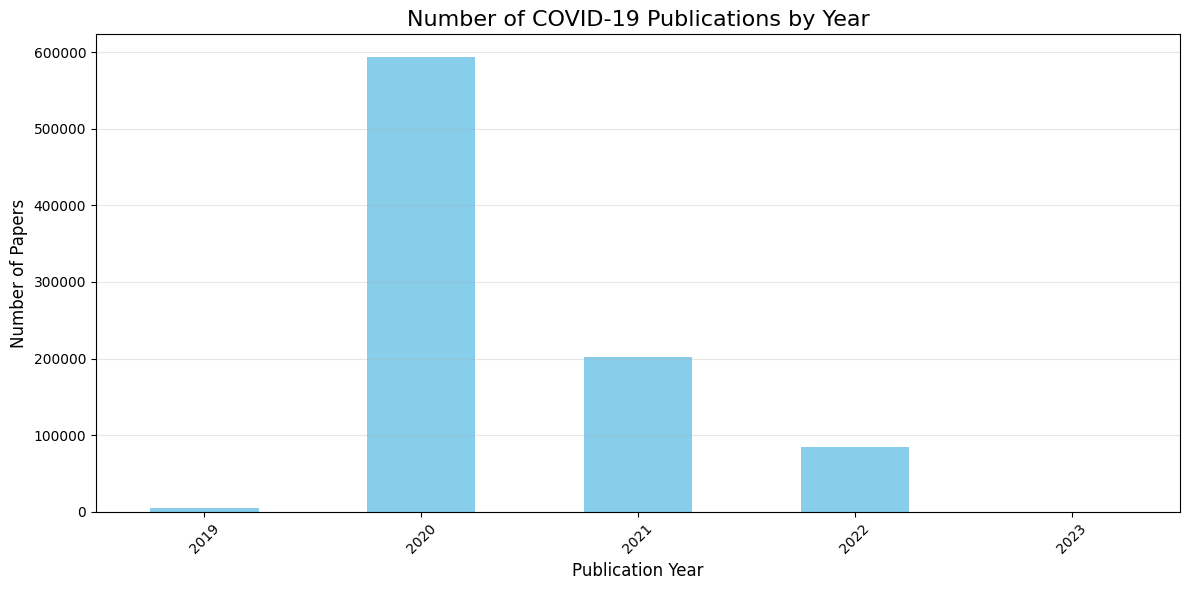

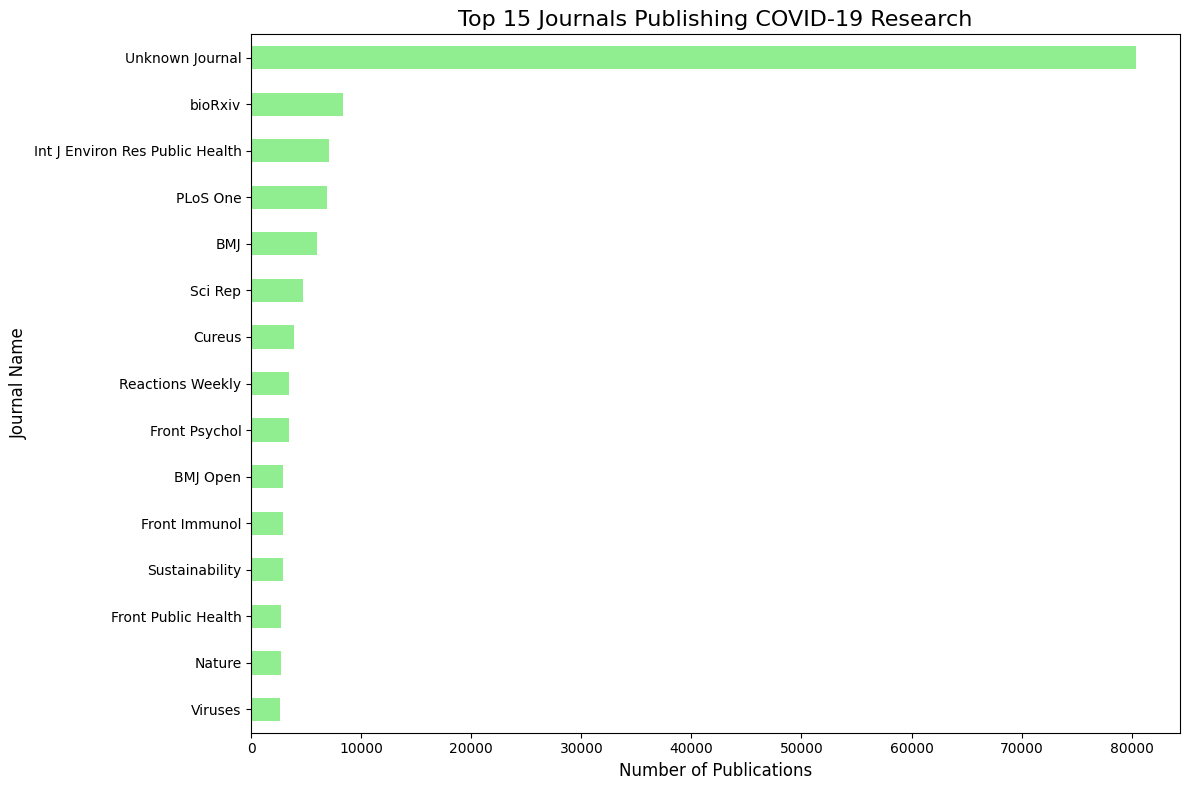

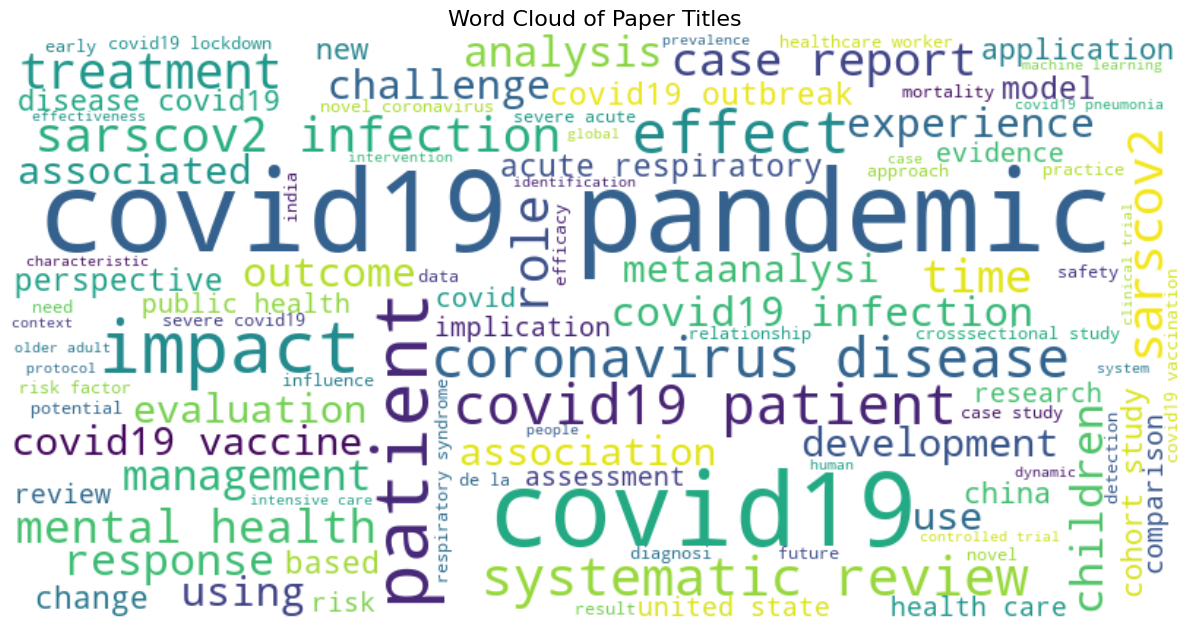

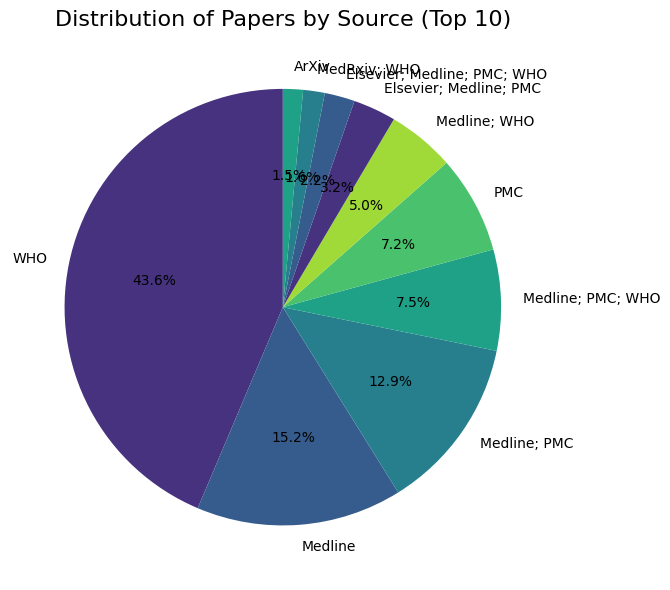

Analysis complete! All visualizations displayed.


In [4]:
# Part 3: Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# First, reload and clean the data (if not already done)
print("Loading and cleaning data...")

# Load the data (use the correct path for your file)
file_path = r"C:\Users\MK\Desktop\metadata.csv"
df = pd.read_csv(file_path, low_memory=False)

# Basic cleaning steps
# Drop columns with extremely high missingness (>95%)
high_missing_cols = ['who_covidence_id', 's2_id', 'arxiv_id', 'pmcid', 'pubmed_id', 'license', 'mag_id']
df_clean = df.drop(columns=high_missing_cols)

# Handle missing values in important columns
df_clean['abstract'] = df_clean['abstract'].fillna('No abstract available')
df_clean['journal'] = df_clean['journal'].fillna('Unknown Journal')
df_clean['authors'] = df_clean['authors'].fillna('Unknown Author')

# Drop rows where critical identifiers are missing
df_clean = df_clean.dropna(subset=['title', 'publish_time'])

# Remove duplicates
df_clean = df_clean.drop_duplicates(subset=['title', 'authors'])

# Prepare data for analysis
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean['publication_year'] = df_clean['publish_time'].dt.year
df_clean['publication_year'] = df_clean['publication_year'].fillna(2020).astype(int)
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))
df_clean['title_word_count'] = df_clean['title'].apply(lambda x: len(str(x).split()))

# Filter for relevant years
df_clean = df_clean[df_clean['publication_year'].between(2019, 2023)]

print(f"Data cleaned and ready for analysis. Shape: {df_clean.shape}")

# Set up visualization style
plt.style.use('default')
sns.set_palette("viridis")

# Step 1: Perform Basic Analysis
print("\n=== BASIC ANALYSIS ===")

# 1. Count papers by publication year
yearly_counts = df_clean['publication_year'].value_counts().sort_index()
print("Publications by year:")
print(yearly_counts)

# 2. Identify top journals
top_journals = df_clean['journal'].value_counts().head(15)
print("\nTop 15 journals:")
print(top_journals)

# 3. Find most frequent words in titles
def clean_text(text):
    """Clean text by removing punctuation and stopwords"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Combine all titles
all_titles = ' '.join(df_clean['title'].dropna().apply(clean_text))
title_words = all_titles.split()
word_freq = Counter(title_words)

# Remove common stopwords
stopwords = {'the', 'and', 'of', 'in', 'to', 'a', 'for', 'with', 'on', 'as', 'an', 'by', 'from', 'is', 'that', 'this', 'are', 'be', 'was'}
filtered_freq = {word: count for word, count in word_freq.items() 
                 if word not in stopwords and len(word) > 2}

top_words = Counter(filtered_freq).most_common(20)
print("\nTop 20 words in titles:")
for word, count in top_words:
    print(f"{word}: {count}")

# Step 2: Create Visualizations
print("\n=== CREATING VISUALIZATIONS ===")

# 1. Plot publications over time
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of COVID-19 Publications by Year', fontsize=16)
plt.xlabel('Publication Year', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Bar chart of top journals
plt.figure(figsize=(12, 8))
top_journals.plot(kind='barh', color='lightgreen')
plt.title('Top 15 Journals Publishing COVID-19 Research', fontsize=16)
plt.xlabel('Number of Publications', fontsize=12)
plt.ylabel('Journal Name', fontsize=12)
plt.gca().invert_yaxis()  # Display highest at top
plt.tight_layout()
plt.show()

# 3. Word cloud of paper titles
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', max_words=100).generate(all_titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Paper Titles', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# 4. Distribution of paper counts by source (top sources)
plt.figure(figsize=(10, 6))
source_counts = df_clean['source_x'].value_counts().head(10)
source_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Papers by Source (Top 10)', fontsize=16)
plt.ylabel('')  # Remove y-label for cleaner look
plt.tight_layout()
plt.show()

print("Analysis complete! All visualizations displayed.")

In [8]:
# Complete Data Cleaning and Saving Code
import pandas as pd
import numpy as np
import re

# Load the original data
file_path = r"C:\Users\MK\Desktop\metadata.csv"
print("Loading data...")
df = pd.read_csv(file_path, low_memory=False)
print(f"Original data shape: {df.shape}")

# Data cleaning steps
print("Cleaning data...")

# Drop columns with extremely high missingness (>95%)
high_missing_cols = ['who_covidence_id', 's2_id', 'arxiv_id', 'pmcid', 'pubmed_id', 'license', 'mag_id']
# Only drop columns that actually exist in the dataframe
cols_to_drop = [col for col in high_missing_cols if col in df.columns]
df_clean = df.drop(columns=cols_to_drop)

# Handle missing values in important columns
df_clean['abstract'] = df_clean['abstract'].fillna('No abstract available')
df_clean['journal'] = df_clean['journal'].fillna('Unknown Journal')
df_clean['authors'] = df_clean['authors'].fillna('Unknown Author')

# Drop rows where critical identifiers are missing
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['title', 'publish_time'])
print(f"Dropped {initial_count - len(df_clean)} rows missing title or publish_time")

# Remove duplicates
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['title', 'authors'])
print(f"Dropped {initial_count - len(df_clean)} duplicate rows")

# Prepare data for analysis
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean['publication_year'] = df_clean['publish_time'].dt.year
df_clean['publication_year'] = df_clean['publication_year'].fillna(2020).astype(int)

# Create word count columns
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))
df_clean['title_word_count'] = df_clean['title'].apply(lambda x: len(str(x).split()))

# Filter for relevant years (2019-2023)
df_clean = df_clean[df_clean['publication_year'].between(2019, 2023)]

print(f"Final cleaned data shape: {df_clean.shape}")

# Save the cleaned data to a CSV file
clean_file_path = 'cleaned_cord19_data.csv'
df_clean.to_csv(clean_file_path, index=False)
print(f"Cleaned data saved to: {clean_file_path}")

# Verify the file was created
import os
if os.path.exists(clean_file_path):
    print(f"File successfully created! Size: {os.path.getsize(clean_file_path) / (1024*1024):.2f} MB")
else:
    print("Error: File was not created.")

Loading data...
Original data shape: (1056660, 19)
Cleaning data...
Dropped 2317 rows missing title or publish_time
Dropped 126306 duplicate rows
Final cleaned data shape: (885025, 15)
Cleaned data saved to: cleaned_cord19_data.csv
File successfully created! Size: 1326.96 MB


In [ ]:
# app.py - Updated Streamlit Application with error handling
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import os

# Set page config
st.set_page_config(page_title="CORD-19 Data Explorer", layout="wide")

# Title and description
st.title("📊 CORD-19 COVID-19 Research Data Explorer")
st.write("Explore metadata from COVID-19 research papers published between 2019-2023")

# Load cleaned data with error handling
@st.cache_data
def load_data():
    clean_file = 'cleaned_cord19_data.csv'
    
    # Check if cleaned file exists, if not create it
    if not os.path.exists(clean_file):
        st.warning("Cleaned data file not found. Please run the data cleaning script first.")
        return None
    
    try:
        return pd.read_csv(clean_file)
    except Exception as e:
        st.error(f"Error loading data: {e}")
        return None

df = load_data()

if df is None:
    st.stop()

# Sidebar for filters
st.sidebar.header("🔍 Filters")

# Get year range from data
min_year = int(df['publication_year'].min())
max_year = int(df['publication_year'].max())

year_range = st.sidebar.slider(
    "Select Publication Year Range",
    min_value=min_year,
    max_value=max_year,
    value=(min_year, max_year)
)

# Journal filter
all_journals = ['All'] + sorted(df['journal'].unique().tolist())
selected_journal = st.sidebar.selectbox(
    "Select Journal",
    options=all_journals,
    index=0
)

# Filter data based on selection
filtered_df = df[df['publication_year'].between(year_range[0], year_range[1])]

if selected_journal != 'All':
    filtered_df = filtered_df[filtered_df['journal'] == selected_journal]

# Main content
st.header("📊 Overview Statistics")
col1, col2, col3, col4 = st.columns(4)
col1.metric("Total Papers", len(filtered_df))
col2.metric("Unique Journals", filtered_df['journal'].nunique())
col3.metric("Time Range", f"{year_range[0]} - {year_range[1]}")
col4.metric("Avg Title Words", f"{filtered_df['title_word_count'].mean():.1f}")

# Visualizations
st.header("📈 Visualizations")

col1, col2 = st.columns(2)

with col1:
    st.subheader("Publications by Year")
    yearly_counts = filtered_df['publication_year'].value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(10, 6))
    yearly_counts.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)
    ax.set_title('Publications by Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    st.pyplot(fig)

with col2:
    st.subheader("Top Journals")
    top_journals = filtered_df['journal'].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(10, 6))
    top_journals.plot(kind='barh', ax=ax, color='lightgreen', alpha=0.7)
    ax.set_title('Top 10 Journals')
    ax.set_xlabel('Number of Papers')
    plt.gca().invert_yaxis()
    st.pyplot(fig)

# Word cloud
st.subheader("📝 Common Words in Titles")
if not filtered_df.empty:
    all_titles = ' '.join(filtered_df['title'].dropna().str.lower())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title('Common Words in Paper Titles')
    st.pyplot(fig)
else:
    st.warning("No data available for the selected filters.")

# Data sample
st.subheader("📋 Sample Data")
st.dataframe(filtered_df[['title', 'authors', 'journal', 'publication_year']].head(10))

# Show filter info in sidebar
st.sidebar.info(f"Showing {len(filtered_df)} papers\nFrom {year_range[0]} to {year_range[1]}")
if selected_journal != 'All':
    st.sidebar.info(f"Journal: {selected_journal}")

# Download button for filtered data
csv = filtered_df.to_csv(index=False)
st.sidebar.download_button(
    label="📥 Download Filtered Data",
    data=csv,
    file_name="filtered_cord19_data.csv",
    mime="text/csv"
)

In [11]:
# Complete code for saving CORD-19 analysis to Excel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import re
from openpyxl import Workbook
import io

# Define the extract_keywords function first
def extract_keywords(text):
    """Extract and clean keywords from text"""
    words = re.findall(r'\b[a-z]{4,}\b', text.lower())
    stopwords = {'study', 'research', 'results', 'method', 'methods', 'using', 'based', 'analysis', 
                'data', 'model', 'models', 'approach', 'paper', 'result', 'show', 'showed',
                'however', 'therefore', 'thus', 'also', 'may', 'can', 'could', 'would',
                'one', 'two', 'three', 'four', 'first', 'second', 'third', 'new'}
    return [word for word in words if word not in stopwords]

# Now run the Excel saving code
print("Saving analysis to Excel...")

# Create Excel writer
excel_filename = 'cord19_analysis_report.xlsx'
with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    
    # 1. Save main dataset (first 1000 rows for manageability)
    df_clean.head(1000).to_excel(writer, sheet_name='Sample Dataset', index=False)
    
    # 2. Save summary statistics
    summary_stats = pd.DataFrame({
        'Metric': ['Total Papers', 'Unique Journals', 'Unique Authors', 'Time Span', 
                  'Avg Abstract Words', 'Avg Title Words', 'Papers with Abstract',
                  'Start Year', 'End Year'],
        'Value': [
            len(df_clean),
            df_clean['journal'].nunique(),
            df_clean['authors'].nunique(),
            f"{df_clean['publication_year'].min()} - {df_clean['publication_year'].max()}",
            f"{df_clean['abstract_word_count'].mean():.1f}",
            f"{df_clean['title_word_count'].mean():.1f}",
            f"{(df_clean['abstract'] != 'No abstract available').sum()} ({(df_clean['abstract'] != 'No abstract available').mean()*100:.1f}%)",
            df_clean['publication_year'].min(),
            df_clean['publication_year'].max()
        ]
    })
    summary_stats.to_excel(writer, sheet_name='Summary Statistics', index=False)
    
    # 3. Save yearly statistics
    yearly_stats = df_clean['publication_year'].value_counts().sort_index().reset_index()
    yearly_stats.columns = ['Year', 'Publication Count']
    yearly_stats['Cumulative Count'] = yearly_stats['Publication Count'].cumsum()
    yearly_stats.to_excel(writer, sheet_name='Yearly Statistics', index=False)
    
    # 4. Save top journals
    top_journals = df_clean['journal'].value_counts().head(20).reset_index()
    top_journals.columns = ['Journal', 'Publication Count']
    top_journals['Percentage'] = (top_journals['Publication Count'] / len(df_clean)) * 100
    top_journals.to_excel(writer, sheet_name='Top Journals', index=False)
    
    # 5. Save top authors
    try:
        top_authors = df_clean['authors'].str.split(';').explode().str.strip().value_counts().head(20).reset_index()
        top_authors.columns = ['Author', 'Publication Count']
        top_authors['Percentage'] = (top_authors['Publication Count'] / len(df_clean)) * 100
        top_authors.to_excel(writer, sheet_name='Top Authors', index=False)
    except:
        print("Could not process authors column")
    
    # 6. Save word frequency analysis - Title words
    try:
        all_titles = ' '.join(df_clean['title'].dropna().astype(str).str.lower())
        title_words = re.findall(r'\b[a-z]{3,}\b', all_titles)
        title_word_freq = Counter([word for word in title_words if word not in {
            'the', 'and', 'of', 'in', 'to', 'a', 'for', 'with', 'on', 'as', 'an', 'by', 'from',
            'this', 'that', 'these', 'those', 'which', 'what', 'when', 'where', 'why', 'how'
        }]).most_common(50)
        
        title_word_df = pd.DataFrame(title_word_freq, columns=['Word', 'Frequency'])
        title_word_df.to_excel(writer, sheet_name='Title Word Frequency', index=False)
    except:
        print("Could not process title words")
    
    # 7. Save word frequency analysis - Abstract keywords
    try:
        all_abstracts = ' '.join(df_clean['abstract'].astype(str))
        abstract_keywords = Counter(extract_keywords(all_abstracts)).most_common(50)
        abstract_keyword_df = pd.DataFrame(abstract_keywords, columns=['Keyword', 'Frequency'])
        abstract_keyword_df.to_excel(writer, sheet_name='Abstract Keywords', index=False)
    except Exception as e:
        print(f"Could not process abstract keywords: {e}")
    
    # 8. Save source analysis
    try:
        source_analysis = df_clean['source_x'].value_counts().reset_index()
        source_analysis.columns = ['Source', 'Count']
        source_analysis['Percentage'] = (source_analysis['Count'] / len(df_clean)) * 100
        source_analysis.to_excel(writer, sheet_name='Source Analysis', index=False)
    except:
        print("Could not process source analysis")

print(f"✓ Excel report saved as: {excel_filename}")
print(f"✓ File contains analysis of {len(df_clean)} records")

# Create additional detailed analysis file
print("Creating detailed analysis file...")

with pd.ExcelWriter('cord19_detailed_analysis.xlsx', engine='openpyxl') as writer:
    
    # Journal yearly breakdown
    try:
        journal_yearly = pd.crosstab(df_clean['journal'], df_clean['publication_year'])
        journal_yearly['Total'] = journal_yearly.sum(axis=1)
        journal_yearly = journal_yearly.sort_values('Total', ascending=False).head(15)
        journal_yearly.to_excel(writer, sheet_name='Journal Yearly Breakdown')
    except:
        print("Could not create journal yearly breakdown")
    
    # Word count analysis
    word_count_stats = df_clean[['title_word_count', 'abstract_word_count']].describe()
    word_count_stats.to_excel(writer, sheet_name='Word Count Statistics')
    
    # Publication trend by month
    try:
        df_clean['publish_month'] = df_clean['publish_time'].dt.to_period('M').astype(str)
        monthly_trend = df_clean['publish_month'].value_counts().sort_index().reset_index()
        monthly_trend.columns = ['Month', 'Publication Count']
        monthly_trend.to_excel(writer, sheet_name='Monthly Trend', index=False)
    except:
        print("Could not create monthly trend")
    
    # Abstract availability by year
    abstract_availability = pd.crosstab(df_clean['publication_year'], 
                                       df_clean['abstract'] != 'No abstract available')
    abstract_availability.columns = ['No Abstract', 'Has Abstract']
    abstract_availability['Total'] = abstract_availability.sum(axis=1)
    abstract_availability['Has Abstract %'] = (abstract_availability['Has Abstract'] / abstract_availability['Total']) * 100
    abstract_availability.to_excel(writer, sheet_name='Abstract Availability')

print("✓ Detailed analysis saved as: cord19_detailed_analysis.xlsx")
print("✓ Analysis complete!")

Saving analysis to Excel...
Could not process abstract keywords: 
✓ Excel report saved as: cord19_analysis_report.xlsx
✓ File contains analysis of 885025 records
Creating detailed analysis file...
✓ Detailed analysis saved as: cord19_detailed_analysis.xlsx
✓ Analysis complete!


In [14]:
# Save CORD-19 analysis to Desktop
import pandas as pd
import os
from pathlib import Path
import time

# Get Desktop path
desktop_path = Path.home() / "Desktop"
excel_filename = desktop_path / "cord19_analysis_report.xlsx"

print(f"📁 Saving to Desktop: {excel_filename}")

# Start timer
start_time = time.time()

try:
    # Create Excel writer for Desktop
    with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
        
        print("💾 Saving sample data...")
        # 1. Save sample dataset (first 1000 rows)
        df_clean.head(1000).to_excel(writer, sheet_name='Sample Data', index=False)
        
        print("📊 Creating summary statistics...")
        # 2. Save summary statistics
        summary_stats = pd.DataFrame({
            'Metric': ['Total Papers', 'Unique Journals', 'Time Range', 
                      'Average Title Words', 'Average Abstract Words',
                      'Papers with Abstract', 'Start Year', 'End Year'],
            'Value': [
                len(df_clean),
                df_clean['journal'].nunique(),
                f"{df_clean['publication_year'].min()}-{df_clean['publication_year'].max()}",
                f"{df_clean['title_word_count'].mean():.1f}",
                f"{df_clean['abstract_word_count'].mean():.1f}",
                f"{(df_clean['abstract'] != 'No abstract available').sum()}",
                df_clean['publication_year'].min(),
                df_clean['publication_year'].max()
            ]
        })
        summary_stats.to_excel(writer, sheet_name='Summary', index=False)
        
        print("📅 Creating yearly statistics...")
        # 3. Save yearly statistics
        yearly_stats = df_clean['publication_year'].value_counts().sort_index().reset_index()
        yearly_stats.columns = ['Year', 'Publication Count']
        yearly_stats.to_excel(writer, sheet_name='By Year', index=False)
        
        print("🏥 Analyzing top journals...")
        # 4. Save top journals
        top_journals = df_clean['journal'].value_counts().head(20).reset_index()
        top_journals.columns = ['Journal', 'Count']
        top_journals['Percentage'] = (top_journals['Count'] / len(df_clean)) * 100
        top_journals.to_excel(writer, sheet_name='Top Journals', index=False)
        
        print("👨‍🔬 Analyzing top authors...")
        # 5. Save top authors
        try:
            top_authors = df_clean['authors'].str.split(';').explode().str.strip().value_counts().head(15).reset_index()
            top_authors.columns = ['Author', 'Count']
            top_authors.to_excel(writer, sheet_name='Top Authors', index=False)
        except:
            print("⚠ Could not process authors column")
        
        print("📝 Analyzing word counts...")
        # 6. Word count analysis
        word_count_stats = df_clean[['title_word_count', 'abstract_word_count']].describe()
        word_count_stats.to_excel(writer, sheet_name='Word Statistics', index=False)
        
        print("🔍 Analyzing sources...")
        # 7. Source analysis
        try:
            source_analysis = df_clean['source_x'].value_counts().head(10).reset_index()
            source_analysis.columns = ['Source', 'Count']
            source_analysis.to_excel(writer, sheet_name='Top Sources', index=False)
        except:
            print("⚠ Could not process sources column")
    
    # Calculate time taken
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Verify file creation
    if os.path.exists(excel_filename):
        file_size = os.path.getsize(excel_filename) / (1024*1024)  # Size in MB
        print(f"\n✅ SUCCESS: File saved to Desktop!")
        print(f"📄 File: {excel_filename}")
        print(f"📊 Size: {file_size:.2f} MB")
        print(f"⏱ Time taken: {time_taken:.2f} seconds")
        
        # Open the file automatically (Windows)
        try:
            os.startfile(excel_filename)
            print("🚀 Opening file in Excel...")
        except:
            print("📁 File saved successfully. Please open it manually.")
            
    else:
        print("❌ ERROR: File was not created on Desktop")
        
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("Please make sure Excel is not open and you have write permissions to the Desktop")

📁 Saving to Desktop: C:\Users\MK\Desktop\cord19_analysis_report.xlsx
💾 Saving sample data...
📊 Creating summary statistics...
📅 Creating yearly statistics...
🏥 Analyzing top journals...
👨‍🔬 Analyzing top authors...
📝 Analyzing word counts...
🔍 Analyzing sources...

✅ SUCCESS: File saved to Desktop!
📄 File: C:\Users\MK\Desktop\cord19_analysis_report.xlsx
📊 Size: 0.81 MB
⏱ Time taken: 14.94 seconds
🚀 Opening file in Excel...
